In [79]:
import ffn
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [41]:
#create a list of tickers to retrieve data for
ev_tickers = ['FUV','VCVC','GOEV','SOLO',
             'PSAC','FSR','GP','KNDI','LI','NGA',
             'RIDE','NKLA','NIO','TSLA','WKHS','XPEV',
             'HYLN','RMO','QS','VCVC','XL','BLNK',
             'TPGY']

In [ ]:
#un-commment and use this cell to determine if there are any issues with any of the tickers

'''
for i in ticker:
    try:
        data = ffn.get(i, start = "####-##-##")
    except:
        print('There is a problem with {}'.format(i))
'''

In [46]:
#retrieve the data
data = ffn.get(ev_tickers, start = '2020-01-01')

In [51]:
#calculate the daily and annual returns
returns_daily = data.to_log_returns().dropna()
returns_annual = returns_daily.mean()*250
#return the length of the daily and annual returns dataframes
len(returns_daily), len(returns_annual)

(54, 23)

In [54]:
#get the daily and annual covariances
cov_daily = returns_daily.cov()
cov_annual = cov_daily*250

In [55]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [107]:
# set the number of combinations for imaginary portfolios
num_assets = len(ev_tickers)
num_portfolios = 50000

In [108]:
#set random seed for reproduction's sake
np.random.seed(42)

In [109]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [110]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [111]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(ev_tickers):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [112]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

In [113]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in ev_tickers]

In [114]:
# reorder dataframe columns
df = df[column_order]

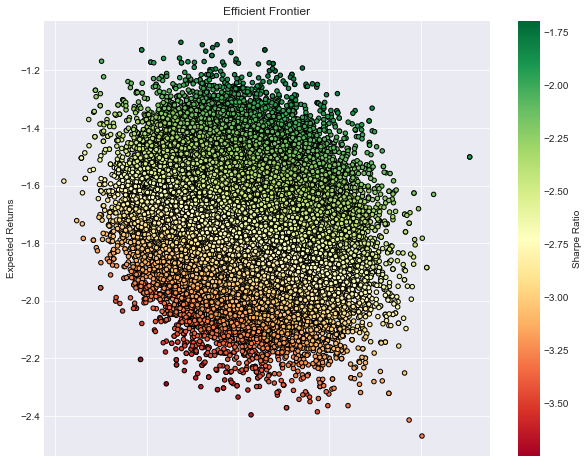

In [115]:
%matplotlib inline
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()